In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/midi-data-containing-melodies/schumm-1.mid
/kaggle/input/midi-data-containing-melodies/schuim-4.mid
/kaggle/input/midi-data-containing-melodies/schub_d760_4.mid
/kaggle/input/midi-data-containing-melodies/schu_143_1.mid
/kaggle/input/midi-data-containing-melodies/schub_d760_3.mid
/kaggle/input/midi-data-containing-melodies/schumm-5.mid
/kaggle/input/midi-data-containing-melodies/schumm-4.mid
/kaggle/input/midi-data-containing-melodies/schubert_D935_1.mid
/kaggle/input/midi-data-containing-melodies/schuim-2.mid
/kaggle/input/midi-data-containing-melodies/schub_d960_2.mid
/kaggle/input/midi-data-containing-melodies/schubert_D850_1.mid
/kaggle/input/midi-data-containing-melodies/schubert_D935_2.mid
/kaggle/input/midi-data-containing-melodies/schubert_D850_3.mid
/kaggle/input/midi-data-containing-melodies/schub_d760_1.mid
/kaggle/input/midi-data-containing-melodies/schubert_D850_4.mid
/kaggle/input/midi-data-containing-melodies/schu_143_2.mid
/kaggle/input/midi-data-containin

In [3]:
!pip install music21

     |████████████████████████████████| 18.5 MB 8.5 MB/s eta 0:00:01
  Created wheel for music21: filename=music21-5.7.2-py3-none-any.whl size=22024602 sha256=ca1ed31bae32f04a649919e09096147380dd1ce40e8a4ee04b5fd2ac929c7b7d
  Stored in directory: /root/.cache/pip/wheels/bc/cb/ae/fd264ebf1e9cf01c15576ee4c128f1bfd907a120c0a7a5b542
Successfully built music21


In [4]:
from music21 import *
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)


In [5]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='../input/midi-data-containing-melodies/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ../input/midi-data-containing-melodies/schumm-1.mid
Loading Music File: ../input/midi-data-containing-melodies/schuim-4.mid
Loading Music File: ../input/midi-data-containing-melodies/schub_d760_4.mid
Loading Music File: ../input/midi-data-containing-melodies/schu_143_1.mid
Loading Music File: ../input/midi-data-containing-melodies/schub_d760_3.mid
Loading Music File: ../input/midi-data-containing-melodies/schumm-5.mid
Loading Music File: ../input/midi-data-containing-melodies/schumm-4.mid
Loading Music File: ../input/midi-data-containing-melodies/schubert_D935_1.mid
Loading Music File: ../input/midi-data-containing-melodies/schuim-2.mid
Loading Music File: ../input/midi-data-containing-melodies/schub_d960_2.mid
Loading Music File: ../input/midi-data-containing-melodies/schubert_D850_1.mid
Loading Music File: ../input/midi-data-containing-melodies/schubert_D935_2.mid
Loading Music File: ../input/midi-data-containing-melodies/schubert_D850_3.mid
Loading Music File: ..

In [6]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

304


(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

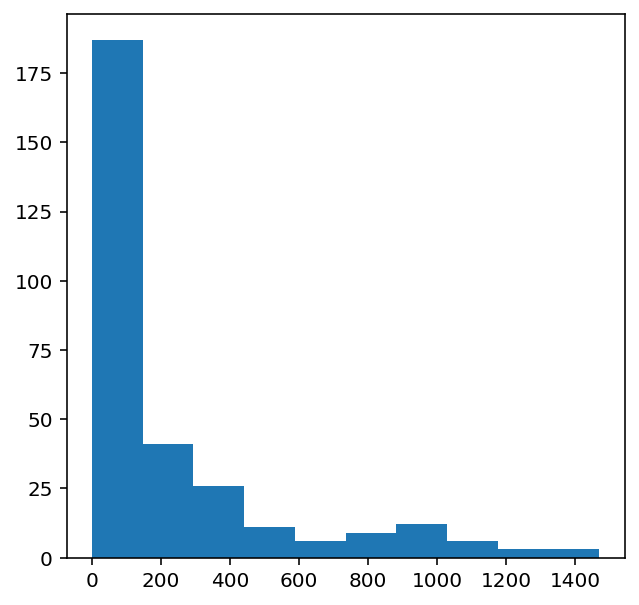

In [7]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [8]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

167


In [9]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

In [10]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [11]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [12]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [13]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [14]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
# def lstm():
#   model = Sequential()
#   model.add(LSTM(128,return_sequences=True))
#   model.add(LSTM(128))
#   model.add(Dense(256))
#   model.add(Activation('relu'))
#   model.add(Dense(n_vocab))
#   model.add(Activation('softmax'))
#   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#   return model

In [17]:
from keras.layers import (Dense,
                            Flatten,Conv1D,Embedding,MaxPool1D,Dropout,GlobalMaxPool1D)
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
# import keras.backend as K

# K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 100)           16700     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 64)            19264     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8, 128)           

In [18]:
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

In [18]:
from keras.callbacks import ModelCheckpoint
filepath = "../working/saved_models-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath,monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [checkpoint]

In [27]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=1000, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)

Epoch 1/1000
403/403 [==============================] - 3s 7ms/step - loss: 2.3583 - acc: 0.3121 - val_loss: 2.7959 - val_acc: 0.2568
Epoch 2/1000
403/403 [==============================] - 3s 7ms/step - loss: 2.3452 - acc: 0.3135 - val_loss: 2.7774 - val_acc: 0.2580
Epoch 3/1000
403/403 [==============================] - 3s 9ms/step - loss: 2.3455 - acc: 0.3151 - val_loss: 2.7761 - val_acc: 0.2631
Epoch 4/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.3396 - acc: 0.3142 - val_loss: 2.7898 - val_acc: 0.2617
Epoch 5/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.3258 - acc: 0.3186 - val_loss: 2.7650 - val_acc: 0.2611
Epoch 6/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.3240 - acc: 0.3192 - val_loss: 2.7722 - val_acc: 0.2685
Epoch 7/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.3283 - acc: 0.3166 - val_loss: 2.7770 - val_acc: 0.2643
Epoch 8/1000
403/403 [==============================] - 3s 7ms

Epoch 62/1000
403/403 [==============================] - 4s 9ms/step - loss: 2.1488 - acc: 0.3600 - val_loss: 2.6699 - val_acc: 0.2930
Epoch 63/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.1430 - acc: 0.3572 - val_loss: 2.6587 - val_acc: 0.2928
Epoch 64/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.1488 - acc: 0.3581 - val_loss: 2.6707 - val_acc: 0.2922
Epoch 65/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.1467 - acc: 0.3557 - val_loss: 2.6745 - val_acc: 0.2929
Epoch 66/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.1424 - acc: 0.3582 - val_loss: 2.6747 - val_acc: 0.2871
Epoch 67/1000
403/403 [==============================] - 3s 7ms/step - loss: 2.1362 - acc: 0.3624 - val_loss: 2.6721 - val_acc: 0.2936
Epoch 68/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.1358 - acc: 0.3597 - val_loss: 2.6690 - val_acc: 0.2954
Epoch 69/1000
403/403 [==============================] 

403/403 [==============================] - 3s 8ms/step - loss: 2.0069 - acc: 0.3878 - val_loss: 2.6082 - val_acc: 0.3134
Epoch 183/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.0021 - acc: 0.3921 - val_loss: 2.6116 - val_acc: 0.3137
Epoch 184/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.9986 - acc: 0.3918 - val_loss: 2.6236 - val_acc: 0.3154
Epoch 185/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.9988 - acc: 0.3926 - val_loss: 2.6149 - val_acc: 0.3148
Epoch 186/1000
403/403 [==============================] - 3s 7ms/step - loss: 2.0029 - acc: 0.3913 - val_loss: 2.6297 - val_acc: 0.3118
Epoch 187/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.9917 - acc: 0.3925 - val_loss: 2.6130 - val_acc: 0.3175
Epoch 188/1000
403/403 [==============================] - 3s 8ms/step - loss: 2.0025 - acc: 0.3921 - val_loss: 2.6122 - val_acc: 0.3182
Epoch 189/1000
403/403 [==============================] - 3s 8m

403/403 [==============================] - 3s 8ms/step - loss: 1.9285 - acc: 0.4085 - val_loss: 2.6000 - val_acc: 0.3312
Epoch 303/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.9306 - acc: 0.4092 - val_loss: 2.6026 - val_acc: 0.3274
Epoch 304/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.9255 - acc: 0.4110 - val_loss: 2.6138 - val_acc: 0.3248
Epoch 305/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.9376 - acc: 0.4089 - val_loss: 2.5994 - val_acc: 0.3270
Epoch 306/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.9283 - acc: 0.4077 - val_loss: 2.6099 - val_acc: 0.3236
Epoch 307/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.9223 - acc: 0.4115 - val_loss: 2.6122 - val_acc: 0.3222
Epoch 308/1000
403/403 [==============================] - 4s 9ms/step - loss: 1.9344 - acc: 0.4098 - val_loss: 2.6070 - val_acc: 0.3218
Epoch 309/1000
403/403 [==============================] - 3s 8m

403/403 [==============================] - 3s 8ms/step - loss: 1.8885 - acc: 0.4189 - val_loss: 2.6196 - val_acc: 0.3309
Epoch 423/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8900 - acc: 0.4212 - val_loss: 2.6124 - val_acc: 0.3311
Epoch 424/1000
403/403 [==============================] - 3s 9ms/step - loss: 1.8855 - acc: 0.4198 - val_loss: 2.6147 - val_acc: 0.3276
Epoch 425/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8878 - acc: 0.4199 - val_loss: 2.6176 - val_acc: 0.3311
Epoch 426/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8860 - acc: 0.4205 - val_loss: 2.6275 - val_acc: 0.3311
Epoch 427/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8960 - acc: 0.4162 - val_loss: 2.6209 - val_acc: 0.3280
Epoch 428/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8845 - acc: 0.4169 - val_loss: 2.6200 - val_acc: 0.3266
Epoch 429/1000
403/403 [==============================] - 3s 8m

403/403 [==============================] - 3s 8ms/step - loss: 1.8581 - acc: 0.4257 - val_loss: 2.6147 - val_acc: 0.3327
Epoch 543/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8659 - acc: 0.4254 - val_loss: 2.6106 - val_acc: 0.3314
Epoch 544/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8713 - acc: 0.4217 - val_loss: 2.6065 - val_acc: 0.3329
Epoch 545/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8645 - acc: 0.4257 - val_loss: 2.6207 - val_acc: 0.3314
Epoch 546/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8700 - acc: 0.4247 - val_loss: 2.6066 - val_acc: 0.3297
Epoch 547/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8608 - acc: 0.4272 - val_loss: 2.6061 - val_acc: 0.3370
Epoch 548/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8666 - acc: 0.4246 - val_loss: 2.6196 - val_acc: 0.3308
Epoch 549/1000
403/403 [==============================] - 3s 7m

403/403 [==============================] - 3s 7ms/step - loss: 1.8417 - acc: 0.4313 - val_loss: 2.6088 - val_acc: 0.3364
Epoch 663/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8382 - acc: 0.4318 - val_loss: 2.6048 - val_acc: 0.3380
Epoch 664/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8430 - acc: 0.4310 - val_loss: 2.6132 - val_acc: 0.3374
Epoch 665/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8434 - acc: 0.4302 - val_loss: 2.6229 - val_acc: 0.3338
Epoch 666/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8370 - acc: 0.4327 - val_loss: 2.6191 - val_acc: 0.3397
Epoch 667/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8386 - acc: 0.4341 - val_loss: 2.6193 - val_acc: 0.3389
Epoch 668/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8407 - acc: 0.4314 - val_loss: 2.6175 - val_acc: 0.3372
Epoch 669/1000
403/403 [==============================] - 3s 7m

403/403 [==============================] - 3s 8ms/step - loss: 1.8236 - acc: 0.4370 - val_loss: 2.6073 - val_acc: 0.3411
Epoch 783/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8303 - acc: 0.4319 - val_loss: 2.6033 - val_acc: 0.3401
Epoch 784/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8209 - acc: 0.4350 - val_loss: 2.6171 - val_acc: 0.3400
Epoch 785/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8205 - acc: 0.4357 - val_loss: 2.6141 - val_acc: 0.3406
Epoch 786/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8214 - acc: 0.4358 - val_loss: 2.6183 - val_acc: 0.3407
Epoch 787/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8331 - acc: 0.4290 - val_loss: 2.6280 - val_acc: 0.3352
Epoch 788/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8225 - acc: 0.4343 - val_loss: 2.6140 - val_acc: 0.3397
Epoch 789/1000
403/403 [==============================] - 3s 7m

403/403 [==============================] - 3s 8ms/step - loss: 1.8153 - acc: 0.4380 - val_loss: 2.6112 - val_acc: 0.3443
Epoch 903/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8147 - acc: 0.4337 - val_loss: 2.6141 - val_acc: 0.3458
Epoch 904/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8109 - acc: 0.4369 - val_loss: 2.6207 - val_acc: 0.3441
Epoch 905/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8210 - acc: 0.4338 - val_loss: 2.6196 - val_acc: 0.3464
Epoch 906/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8131 - acc: 0.4380 - val_loss: 2.6203 - val_acc: 0.3401
Epoch 907/1000
403/403 [==============================] - 3s 7ms/step - loss: 1.8082 - acc: 0.4398 - val_loss: 2.6120 - val_acc: 0.3415
Epoch 908/1000
403/403 [==============================] - 3s 8ms/step - loss: 1.8109 - acc: 0.4405 - val_loss: 2.6154 - val_acc: 0.3414
Epoch 909/1000
403/403 [==============================] - 3s 7m

In [22]:
# #loading best model
# from keras.models import load_model
# model = load_model('best_model.h5')

In [32]:
len(x_val)

12883

In [39]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[83, 83, 61, 61, 83, 83, 110, 83, 110, 162]


In [40]:
random_music

array([110, 120, 137,  16,  98,  61, 137,  98,  83,  61,  98, 110,  61,
        98,  83,  61, 137,  98,  61,  83,  98,  61,  83,  83,  61,  61,
        83,  83, 110,  83, 110, 162])

In [41]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [42]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [43]:
convert_to_midi(predicted_notes)